<a href="https://colab.research.google.com/github/B1501/LGMVIP--DataScience-Task-1/blob/main/Task_1_Iris_Flower_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading the Iris Dataset


In [4]:
Iris_data = pd.read_csv("/content/iris_data.csv")
Iris_data

,Sepal length,Sepal width,Petal length,Petal width,Class Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Cleaning and Analysing



In [5]:
#Checking if there are any missing values or duplicates in the data
Iris_data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class Labels    0
dtype: int64

In [6]:
#Tell you how many rows and columns are present in the dataset
Iris_data.shape

(150, 5)

In [7]:
#Tells about the description of every column data as series of numerical data.
Iris_data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Class Distrubution : It tells how many rows are present in each class
Iris_data.groupby('Class Labels').size()

Class Labels
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization


1. Before going through the visualization I have divided the data into features and labels.It got split into two arrays
F = Features
L = Labels

In [9]:
feature_columns = ['Sepal length', 'Sepal width', 'Petal length','Petal width']
F = Iris_data[feature_columns].values
L = Iris_data['Class Labels'].values

# **Parallel Coordinates Plotting**
Means Plotting multivariate data and it can be represented as connected line segment

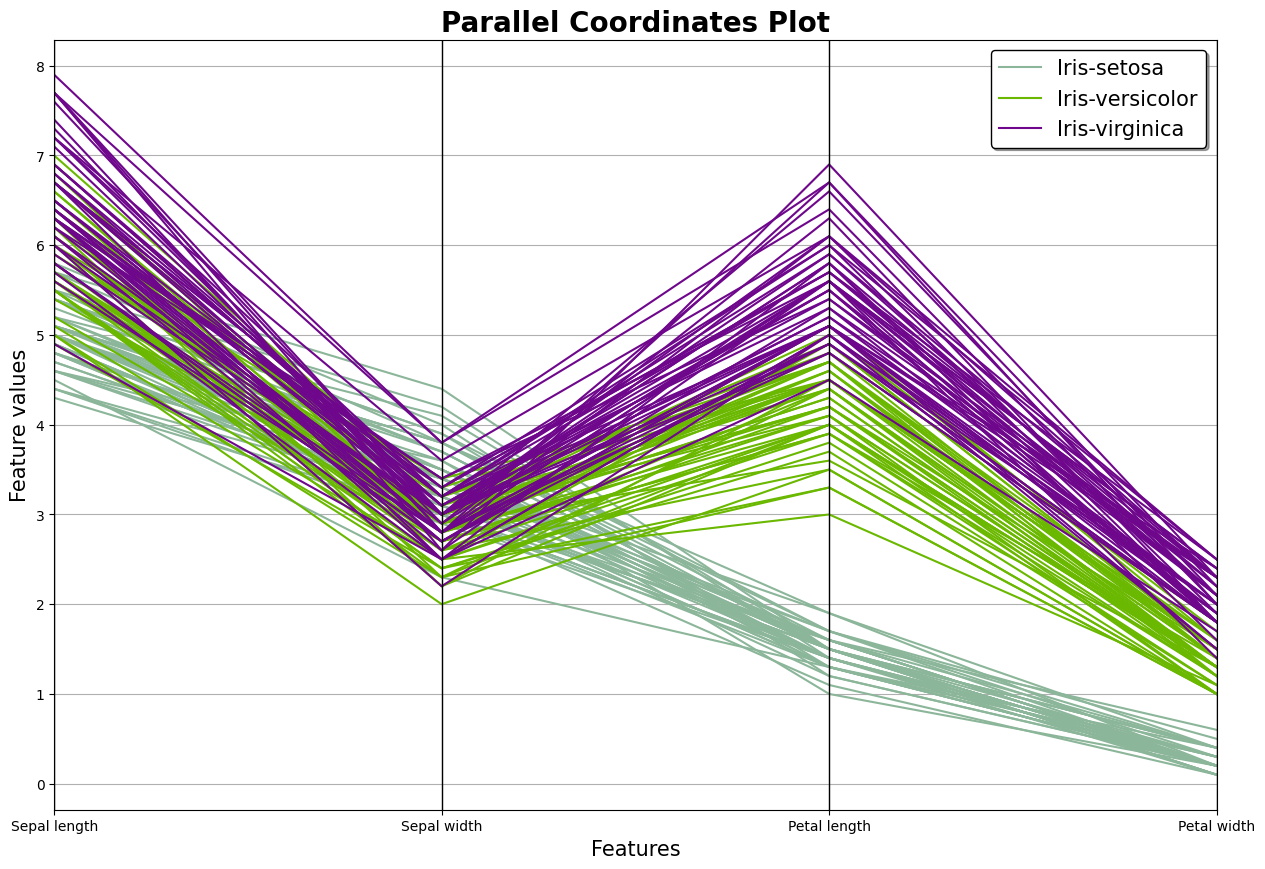

In [10]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(Iris_data, "Class Labels")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

# **PairPlot**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


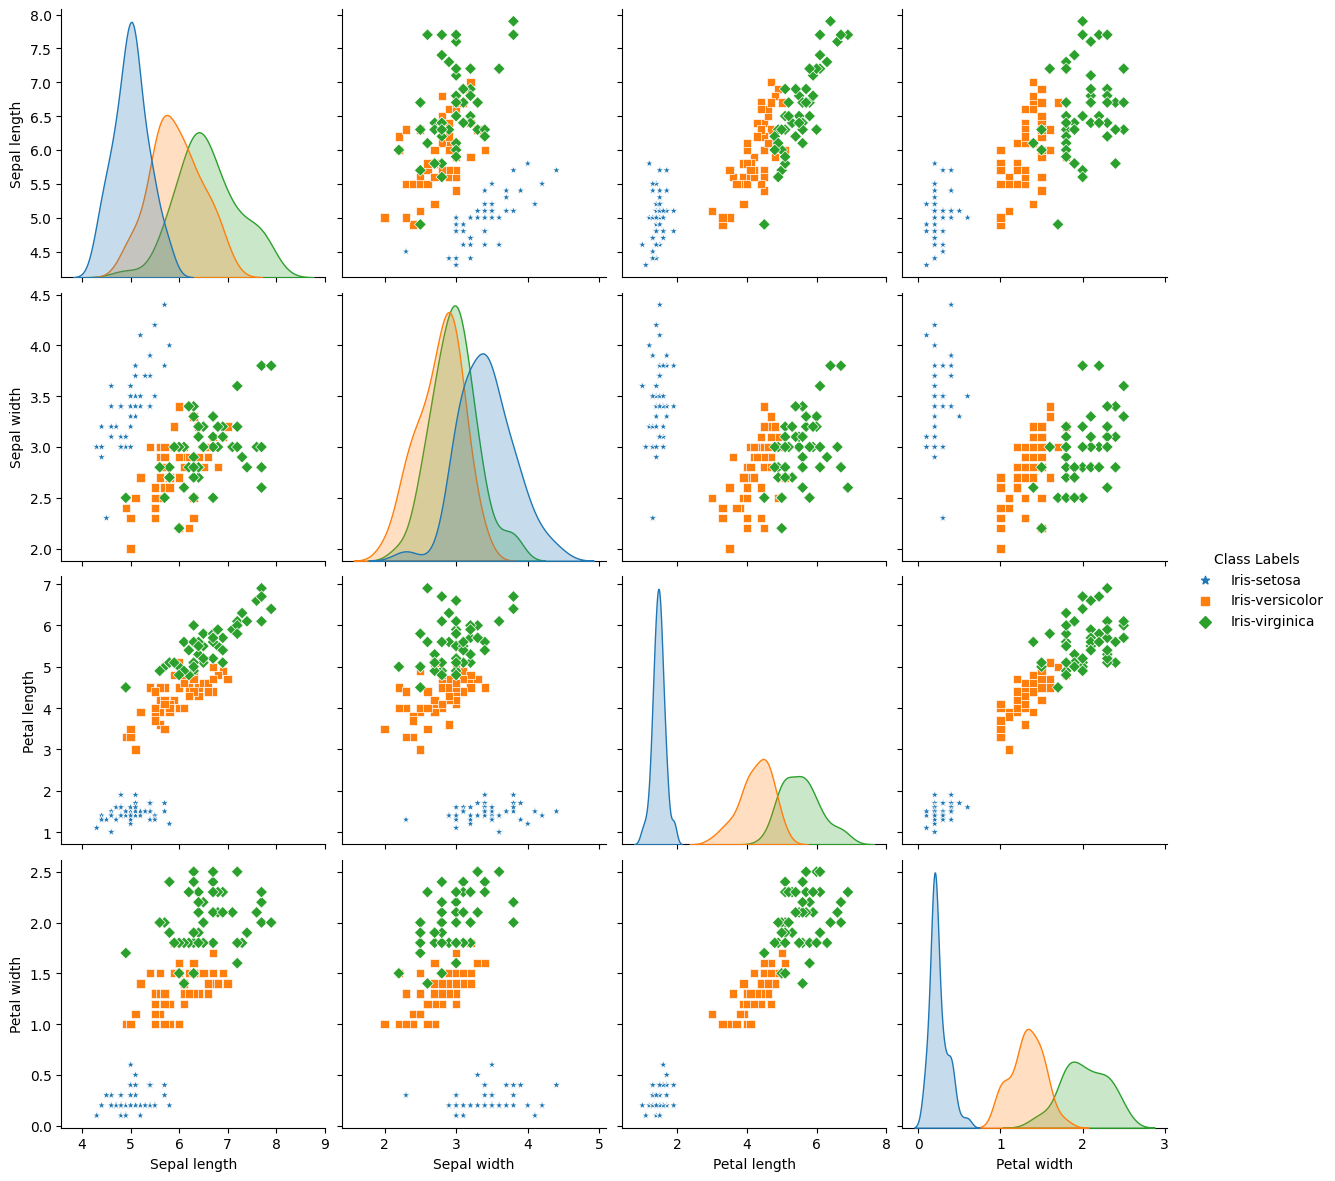

In [11]:
import seaborn as sns
sns.pairplot(Iris_data, hue = "Class Labels", size=3, markers=["*", "s", "D"])
plt.show()

# Box Plot

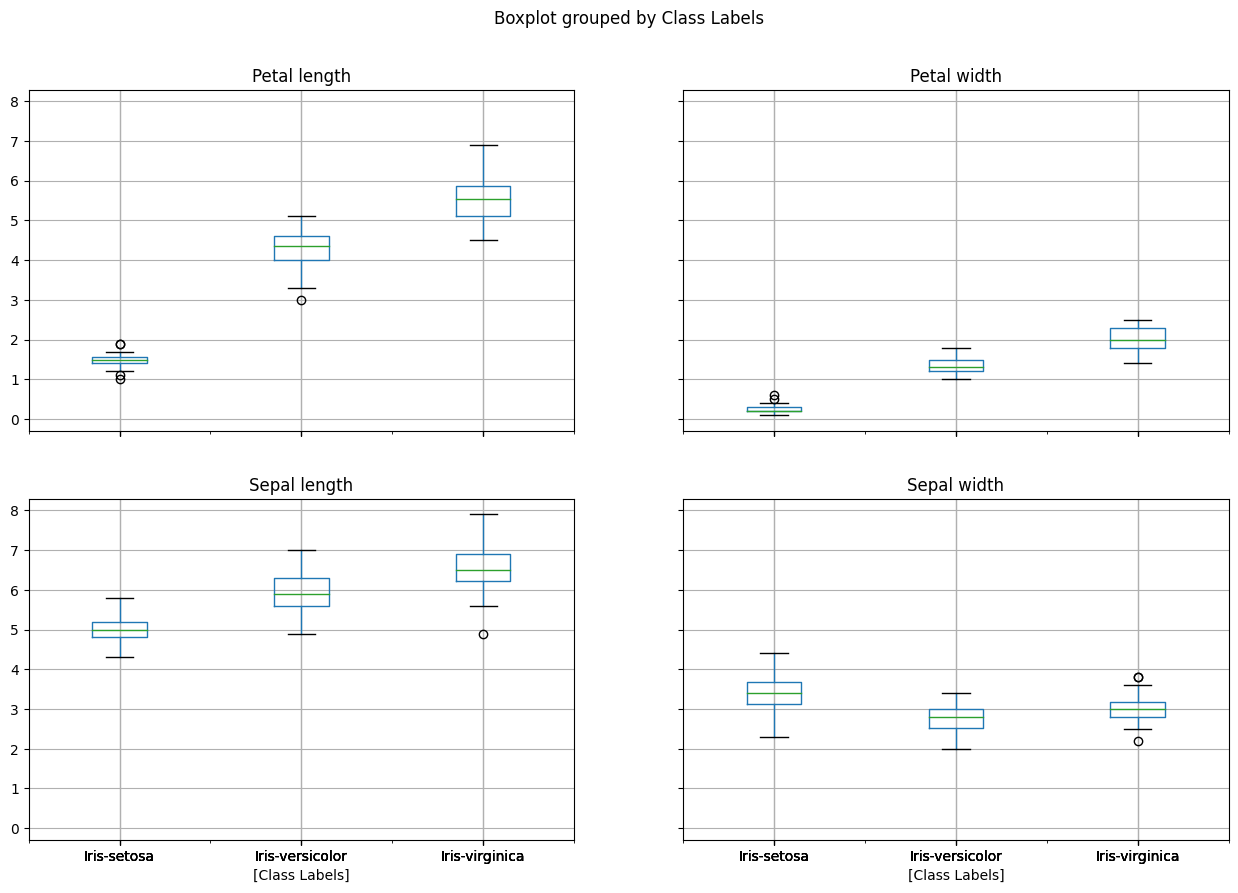

In [21]:
Iris_data.boxplot(by="Class Labels", figsize=(15, 10))
plt.show()

# **Relationship Between the Class Lables and sepal length**


<Axes: xlabel='Class Labels', ylabel='Sepal length'>

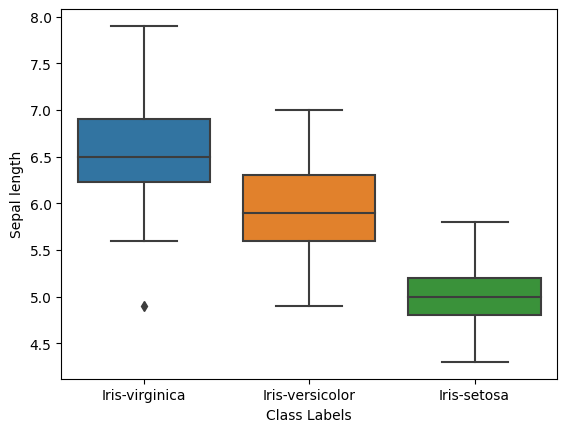

In [22]:
#plt.figure(figsize=(15,8))
sns.boxplot(x='Class Labels',y='Sepal length',data=Iris_data.sort_values('Sepal length',ascending=False))

# **Relationship between the sepal length an sepal width**

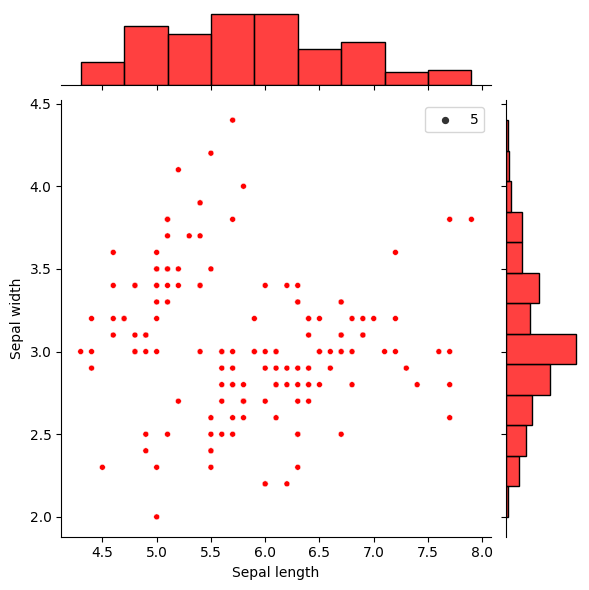

In [14]:
sns.jointplot(x="Sepal length", y="Sepal width", data=Iris_data, size=5, color='red')

# **Heat Map**

<ipython-input-34-b7c28b3a7379>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Iris_map = sns.heatmap(Iris_data.corr(),annot=True,cmap='RdBu',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


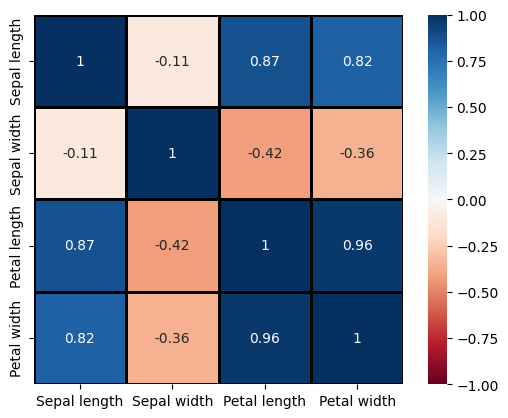

In [34]:
Iris_map = sns.heatmap(Iris_data.corr(),annot=True,cmap='RdBu',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# **Splitting the dataset into training set and testing set to train the model using different machine learning alogirthms**

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [71]:
X = Iris_data.iloc[:, :-1].values
y = Iris_data.iloc[:, -1].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

# **1. Logistic Regression**
I have trained simple linear regression model

In [74]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logisticreg_model = LogisticRegression()
logisticreg_model.fit(X, y)
Log_pred = logisticreg_model.predict(X)
print(classification_report(y, Log_pred))
print(confusion_matrix(y, Log_pred))
print("The accuracy of the logistic regression model is:", metrics.accuracy_score(y, Log_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
The accuracy of the logistic regression model is: 0.9733333333333334


# **Logistic Curve based on the classification report**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

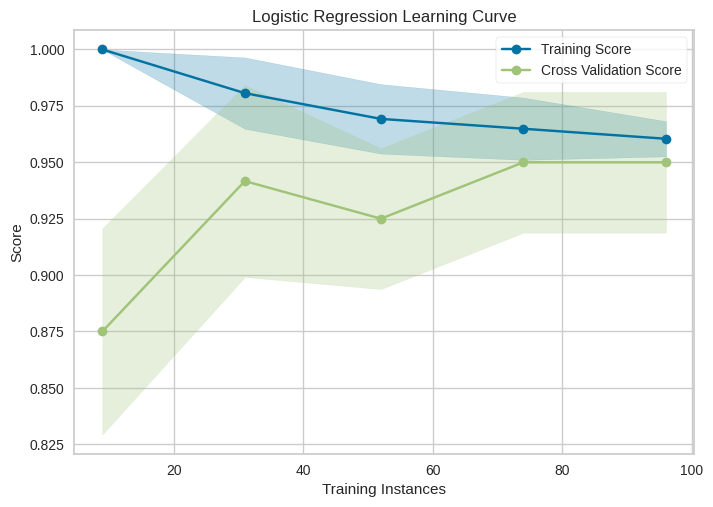

In [75]:
from yellowbrick.model_selection import LearningCurve
Iris_log_curve = LearningCurve(logisticreg_model, title = 'Logistic Regression Learning Curve')
Iris_log_curve.fit(X_train, y_train)
Iris_log_curve.finalize()

# **Predicted values based on the train and test data - Logistic Regression**

In [76]:
predict_iris = logisticreg_model.predict(X_test)
# comparing the test and train data
compar_iris = pd.DataFrame({'actual output': y_test, 'predicted output': predict_iris})
compar_iris = compar_iris.reset_index(drop = True)
compar_iris[:15]

,actual output,predicted output
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


## **2. KNN - KNearest Neighbor Classification with K=6**

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Iris_Model = KNeighborsClassifier(n_neighbors=5)
KNN_Iris_Model.fit(X_train,y_train)
KNN_predict = KNN_Iris_Model.predict(X_test)
print(classification_report(y_test, KNN_predict))
print(confusion_matrix(y_test, KNN_predict))
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,KNN_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Accuracy Score: 1.0


# **KNN Learning Curve**

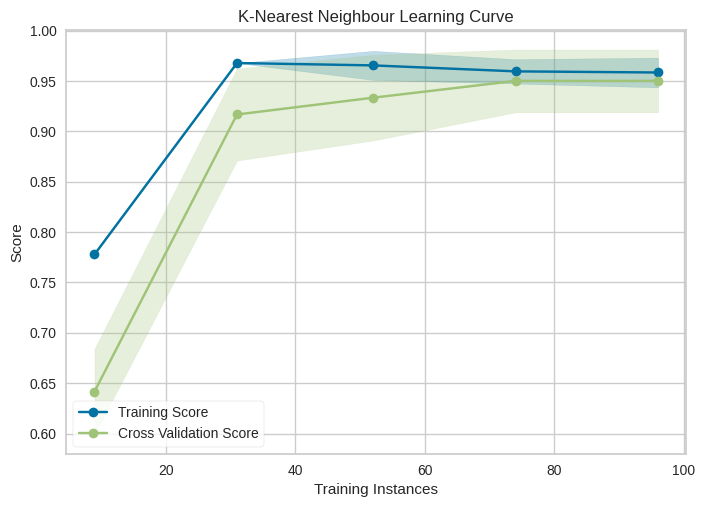

In [78]:
Iris_knn_curve = LearningCurve(KNN_Iris_Model, title = 'K-Nearest Neighbour Learning Curve')
Iris_knn_curve.fit(X_train, y_train)
Iris_knn_curve.finalize()

# **3. Support Vector machine**

In [88]:
from sklearn.svm import SVC
SVMclassifier=SVC()
SVMclassifier.fit(X_train, y_train)
Iris_pred_SVM = SVMclassifier.predict(X_test)
print(classification_report(y_test, Iris_pred_SVM))
print(confusion_matrix(y_test, Iris_pred_SVM))
print("The accuracy of the support vector machine is :", accuracy_score(Iris_pred_SVM, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
The accuracy of the support vector machine is : 1.0


# **SVM Curve**

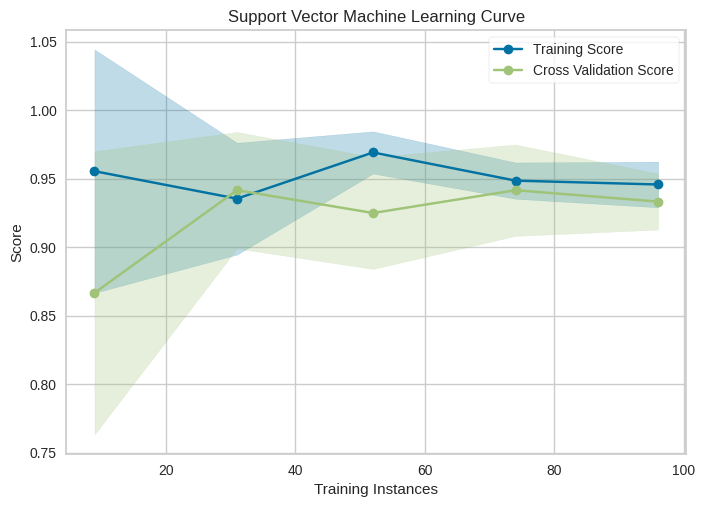

In [90]:
Iris_svm_curve = LearningCurve(SVMclassifier, title = 'Support Vector Machine Learning Curve')
Iris_svm_curve.fit(X_train, y_train)
Iris_svm_curve.finalize()

# **4. Decision Tree Model**

In [96]:
from sklearn.tree import DecisionTreeClassifier
Iris_DT = DecisionTreeClassifier(random_state = 0, splitter = 'random')
Iris_DT.fit(X_train, y_train)
Iris_pred = Iris_DT.predict(X_test)
print(classification_report(y_test, Iris_pred))
print(confusion_matrix(y_test, Iris_pred))
print("The accuracy of the decision tree is:", accuracy_score(Iris_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
The accuracy of the decision tree is: 1.0


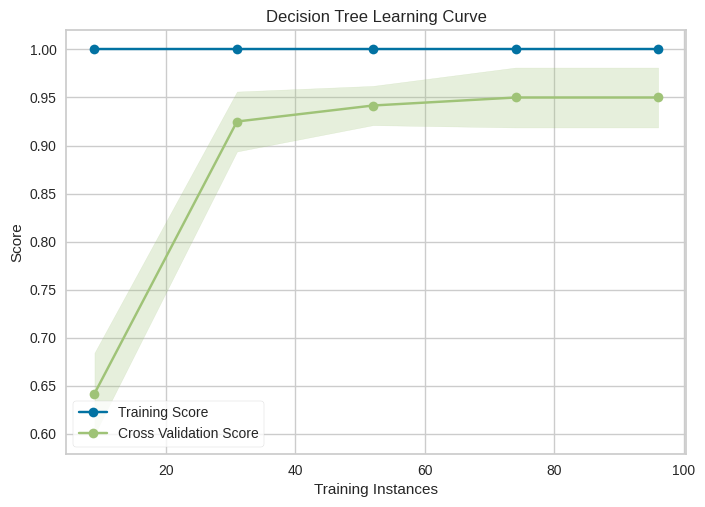

In [97]:
dtclc = LearningCurve(Iris_DT,  title = 'Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.finalize()

In [102]:
Best_Model_Selec = pd.DataFrame({
    'Model': ['Logistic Regression','KNN' ,'SVM','Decision Tree'],
    'Score': [0.973,1.0,1.0,1.0]})

Model_Results = Best_Model_Selec.sort_values(by='Score', ascending=False)
Model_Results = Model_Results.set_index('Score')
print(Model_Results)

                     Model
Score                     
1.000                  KNN
1.000                  SVM
1.000        Decision Tree
0.973  Logistic Regression
